### A Complete Machine Learning Project Walk-Through in Python: Part One
https://towardsdatascience.com/a-complete-machine-learning-walk-through-in-python-part-one-c62152f39420

The objective is to use the energy data to build a model that can predict the Energy Star Score of a building and interpret the results to find the factors which influence the score.

In [1]:
import pandas as pd
import numpy as np

# read data
data = pd.read_csv('./Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


When I originally got the assignment from the start-up, I didn’t want to ask what all the column names meant, so I looked at the name of the file,

and decided to search for “Local Law 84”. That led me to this page which explains this is an NYC law requiring all buildings of a certain size to report their energy use. http://www.nyc.gov/html/gbee/downloads/misc/nyc_benchmarking_disclosure_data_definitions_2017.pdf

We don’t need to study all of the columns, but we should at least understand the Energy Star Score, which is described as:

#### A 1-to-100 percentile ranking based on self-reported energy usage for the reporting year. The Energy Star score is a relative measure used for comparing the energy efficiency of buildings.

That clears up the first problem, but the second issue is that missing values are encoded as “Not Available”.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11746 non-null object
NYC Building Identification Number (BIN)                      11746 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     11746 non-null object
Postal Code                                          

In [11]:
# replace to special type
data = data.replace({'Not Available': np.nan})

for col in list(data.columns):
    # select should be numeric columns 
    if('ft²' in col or 'kBtu' in col or 'Metric Tons CO2' in col or 'kWh' in col 
       or 'therms' in col or 'gal' in col or 'Score' in col):
        data[col] = data[col].astype(float)
        
        

In [14]:
len(data)

11746

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11735 non-null object
NYC Building Identification Number (BIN)                      11584 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     207 non-null object
Postal Code                                            

data.isnull().sum() # aggregate columns data

In [40]:
#function to calculate missing values
# source https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe/39734251#39734251

def missing_values_table(df):
    # total missing and percent
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # make table with result
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
    # rename cols
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0:'Missing Values', 
                                                                1: '% of Total Values'})
    
    mis_val_table_ren_columns = mis_val_table_ren_columns[ \
                mis_val_table_ren_columns.iloc[:,1] != 0] \
                .sort_values('% of Total Values', ascending=False) \
                .round(1)
   

    print("Your selected dataframe has "+str(df.shape[1])+" columns.\n"
        "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values. ")
    
    return mis_val_table_ren_columns
    
missing_values_table(data)

Your selected dataframe has 60 columns.
There are 46 columns that have missing values. 


,Missing Values,% of Total Values
Fuel Oil #1 Use (kBtu),11737,99.9
Diesel #2 Use (kBtu),11730,99.9
Address 2,11539,98.2
Fuel Oil #5 & 6 Use (kBtu),11152,94.9
District Steam Use (kBtu),10810,92.0
Fuel Oil #4 Use (kBtu),10425,88.8
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.4
3rd Largest Property Use Type,10262,87.4
Fuel Oil #2 Use (kBtu),9165,78.0
2nd Largest Property Use Type,8005,68.2


In [21]:
data.isnull().sum() # aggregate columns data

Order                                                             0
Property Id                                                       0
Property Name                                                     0
Parent Property Id                                                0
Parent Property Name                                              0
BBL - 10 digits                                                  11
NYC Borough, Block and Lot (BBL) self-reported                   11
NYC Building Identification Number (BIN)                        162
Address 1 (self-reported)                                         0
Address 2                                                     11539
Postal Code                                                       0
Street Number                                                   124
Street Name                                                     122
Borough                                                         118
DOF Gross Floor Area                            

Cool description of outliers an boxplot https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm

In [41]:
# sorted!
d = [30, 171, 184, 201, 212, 250, 265, 270, 272, 289, 305, 306, 322, 322, 336, 346, 351, 370, 390, 404, 409, 411, 436, 437, 439, 441, 444, 448, 451, 453, 470, 480, 482, 487, 494, 495, 499, 503, 514, 521, 522, 527, 548, 550, 559, 560, 570, 572, 574, 578, 585, 592, 592, 607, 616, 618, 621, 629, 637, 638, 640, 656, 668, 707, 709, 719, 737, 739, 752, 758, 766, 792, 792, 794, 802, 818, 830, 832, 843, 858, 860, 869, 918, 925, 953, 991, 1000, 1005, 1068, 1441]

In [51]:
N=len(d)
highest1 = d[(N-1)/2]
highest2 = d[(N-1)/2 + 1]
print highest1, highest2

median = (highest1 + highest2)/2.0
print "median=",median

559 560
median= 559.5


In [68]:
lower_quartile_idx = .25*(N+1)
lower_quartile_low = d[int(lower_quartile_idx)-1]

print lower_quartile_idx, lower_quartile_low

lower_quartile_up_idx = lower_quartile_idx + 1
lower_quartile_up = lower_quartile_low + .75*(d[int(lower_quartile_up_idx-1)] - 
                                                 d[int(lower_quartile_idx-1)])
print lower_quartile_up_idx, lower_quartile_up

22.75 411
23.75 429.75


In [70]:
upper_quartile_idx = .75*(N+1)
upper_quartile_low = d[int(upper_quartile_idx) -1]

print upper_quartile_idx, upper_quartile_low

upper_quartile_up_idx = upper_quartile_idx+1
upper_quartile_up = upper_quartile_low + .25*(d[int(upper_quartile_up_idx-1)] -
                                             d[int(upper_quartile_idx-1)])
print upper_quartile_up_idx, upper_quartile_up

68.25 739
69.25 742.25


In [72]:
interquartile_range = upper_quartile_up - lower_quartile_up
print interquartile_range

312.5


In [73]:
lower_inner_fence = lower_quartile_up - 1.5*interquartile_range
print lower_inner_fence

-39.0


In [75]:
upper_inner_fence = upper_quartile_up + 1.5*interquartile_range
print upper_inner_fence

1211.0


In [76]:
lower_outer_fence = lower_quartile_up - 3.0*interquartile_range
print lower_outer_fence

-507.75


In [77]:
upper_outer_fence = upper_quartile_up + 3.0*interquartile_range
print upper_outer_fence

1679.75


In [79]:
print "mild outlier range is ", lower_inner_fence, upper_inner_fence 

mild outlier range is  -39.0 1211.0


In [81]:
print "extreme outlier range is ", lower_outer_fence, upper_outer_fence

extreme outlier range is  -507.75 1679.75


In [83]:
%matplotlib inline

In [84]:
import matplotlib.pyplot as plt

{'boxes': [<matplotlib.lines.Line2D at 0x7fa222b8e310>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa222b1c250>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa222b27550>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa222b1ced0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa222cabad0>,
  <matplotlib.lines.Line2D at 0x7fa222b8ebd0>]}

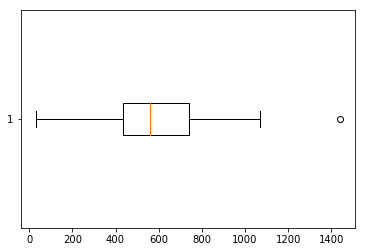

In [90]:
plt.boxplot(d, vert=False)

(array([  2.,  10.,  18.,  23.,  13.,  16.,   6.,   1.,   0.,   1.]),
 array([   30. ,   171.1,   312.2,   453.3,   594.4,   735.5,   876.6,
         1017.7,  1158.8,  1299.9,  1441. ]),
 <a list of 10 Patch objects>)

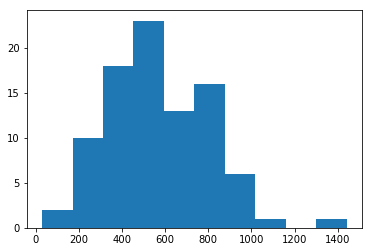

In [88]:

plt.hist(d)

The outlier is identified as the largest value in the data set, 1441, and appears as the circle to the right of the box plot. 

#### Outliers may contain important information. 

Outliers should be investigated carefully. Often they contain valuable information about the process under investigation or the data gathering and recording process. Before considering the possible elimination of these points from the data, one should try to understand why they appeared and whether it is likely similar values will continue to appear. Of course, outliers are often bad data points. 

In [91]:
missing_df = missing_values_table(data)

Your selected dataframe has 60 columns.
There are 46 columns that have missing values. 


In [108]:
missing_columns = missing_df[missing_df['% of Total Values'] > 50].index
print("we will remove %d columns." % len(missing_col))

we will remove 11 columns.


In [109]:
list(missing_df[missing_df['% of Total Values'] > 50].index) # magic!

['Fuel Oil #1 Use (kBtu)',
 'Diesel #2 Use (kBtu)',
 'Address 2',
 'Fuel Oil #5 & 6 Use (kBtu)',
 'District Steam Use (kBtu)',
 'Fuel Oil #4 Use (kBtu)',
 '3rd Largest Property Use Type - Gross Floor Area (ft\xc2\xb2)',
 '3rd Largest Property Use Type',
 'Fuel Oil #2 Use (kBtu)',
 '2nd Largest Property Use Type',
 '2nd Largest Property Use - Gross Floor Area (ft\xc2\xb2)']

In [111]:
data = data.drop(list(missing_columns), axis=1)

In [112]:
pd.__version__

u'0.20.1'

#### Exploratory Data Analysis 
Exploratory Data Analysis (EDA) is an open-ended process where we calculate statistics and make figures to find trends, anomalies, patterns, or relationships within the data.

In [114]:
# rename target column
data = data.rename(columns = {'ENERGY STAR Score': 'score'})

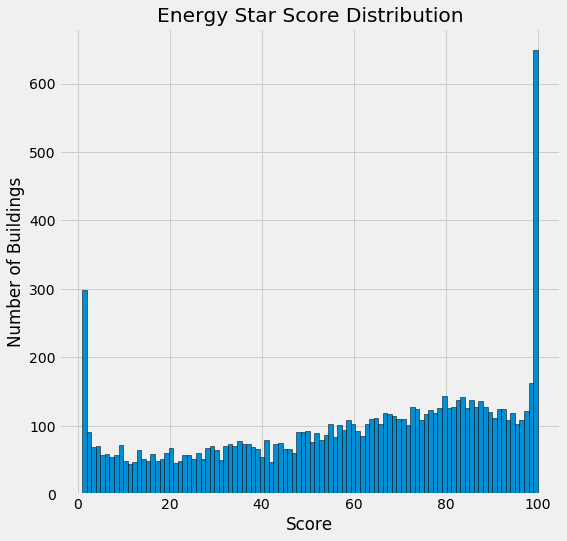

In [121]:
# Examining distribution of target value
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.style.use('fivethirtyeight')
plt.hist(data['score'].dropna(), bins=100, edgecolor='k')
plt.xlabel('Score'); plt.ylabel('Number of Buildings')
plt.title('Energy Star Score Distribution')




This looks quite suspicious! The Energy Star score is a percentile rank, which means we would expect to see a uniform distribution, with each score assigned to the same number of buildings. However, a disproportionate number of buildings have either the highest, 100, or the lowest, 1, score (higher is better for the Energy Star score).

If we go back to the definition of the score, we see that it is based on “self-reported energy usage” which might explain the very high scores. Asking building owners to report their own energy usage is like asking students to report their own scores on a test! As a result, this probably is not the most objective measure of a building’s energy efficiency.

#### Looking for Relationships

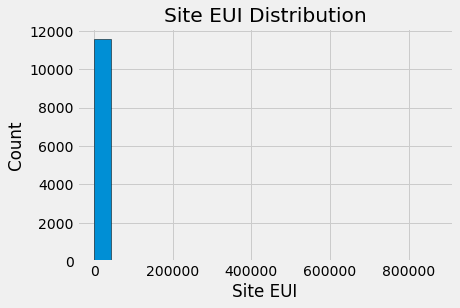

In [122]:
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Site EUI'); plt.ylabel('Count'); plt.title('Site EUI Distribution')

Outliers problem? The graph is incredibly skewed because of the presence of a few buildings with very high scores

In [123]:
# get column stat
data['Site EUI (kBtu/ft\xc2\xb2)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [124]:
# get the most bigger values of columns
data['Site EUI (kBtu/ft\xc2\xb2)'].dropna().sort_values().tail(10)

3173     51328.8
3170     51831.2
3383     78360.1
8269     84969.6
3263     95560.2
8268    103562.7
8174    112173.6
3898    126307.4
7       143974.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

In [127]:
# get info for outliers redord
data.loc[data['Site EUI (kBtu/ft\xc2\xb2)'] == 869265, :]

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
8068,9984,4414323,234 Skillman,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3028937502,3028937502,"3390250 , 3338313",234 Skillman avenue,11211,...,912801.1,05/01/2017 11:34:14 PM,NaN,In Compliance,40.716233,-73.94141,1.0,34.0,477.0,East Williamsburg ...
